In [5]:
import re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [6]:
df = pd.read_csv('clean-data/Whiskey_data/Whiskey_Advocate_All_scraped_KHupdate-23 Jul (Team Style Defined) with descriptions.csv')

In [7]:
df.columns

Index(['Unnamed: 0', 'Index', 'Maker', 'Year Distrilled', 'age in cast', 'ABV',
       'Single Malt Scotch', 'Flavored Whiskey and Liqueurs', 'Bourbon',
       ' Blended Malt Scotch Whisky ', 'Blended Scotch Whisky',
       'Blended Whiskey (Multi-country)',
       ' Single Malt Whisky (Multi-country)',
       ' Single Grain Whisky (Multi-country)', 'Japan', ' Canada', 'Irish',
       'Generic Whisky (Multi-country)', 'Rye Whisky', 'White Whisky',
       'Craft Whisky', 'SUM', 'Review Score (Points)', ' price ',
       'Original Style', 'country', 'descriptions'],
      dtype='object')

In [8]:
df = df[['Single Malt Scotch', 'Flavored Whiskey and Liqueurs', 'Bourbon',
       ' Blended Malt Scotch Whisky ', 'Blended Scotch Whisky',
       'Blended Whiskey (Multi-country)',
       ' Single Malt Whisky (Multi-country)',
       ' Single Grain Whisky (Multi-country)', 'Japan', ' Canada', 'Irish',
       'Generic Whisky (Multi-country)', 'Rye Whisky', 'White Whisky','Craft Whisky', 'descriptions']]

In [9]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    

In [10]:
df['descriptions'] = df['descriptions'].apply(clean_text)

In [11]:
categories = list(df.columns)
categories.pop(-1)
categories

['Single Malt Scotch',
 'Flavored Whiskey and Liqueurs',
 'Bourbon',
 ' Blended Malt Scotch Whisky ',
 'Blended Scotch Whisky',
 'Blended Whiskey (Multi-country)',
 ' Single Malt Whisky (Multi-country)',
 ' Single Grain Whisky (Multi-country)',
 'Japan',
 ' Canada',
 'Irish',
 'Generic Whisky (Multi-country)',
 'Rye Whisky',
 'White Whisky',
 'Craft Whisky']

In [29]:
y = df[categories]
X = df['descriptions']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.33, shuffle=True)

print(X_train.shape)
print(X_test.shape)

(3166,)
(1560,)


In [68]:
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

In [77]:
result_df = pd.DataFrame(columns = ['style', 'score'], index = [i for i in range(len(categories))])
i = 0
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    result_df.iat[i, 0] = category
    result_df.iat[i, 1] = accuracy_score(test[category], prediction)
    i += 1

... Processing Single Malt Scotch
Test accuracy is 0.8685897435897436
... Processing Flavored Whiskey and Liqueurs
Test accuracy is 0.9852564102564103
... Processing Bourbon
Test accuracy is 0.875
... Processing  Blended Malt Scotch Whisky 
Test accuracy is 0.9653846153846154
... Processing Blended Scotch Whisky
Test accuracy is 0.948076923076923
... Processing Blended Whiskey (Multi-country)
Test accuracy is 0.9762820512820513
... Processing  Single Malt Whisky (Multi-country)
Test accuracy is 0.9673076923076923
... Processing  Single Grain Whisky (Multi-country)
Test accuracy is 0.9839743589743589
... Processing Japan
Test accuracy is 0.9794871794871794
... Processing  Canada
Test accuracy is 0.9576923076923077
... Processing Irish
Test accuracy is 0.9801282051282051
... Processing Generic Whisky (Multi-country)
Test accuracy is 0.9346153846153846
... Processing Rye Whisky
Test accuracy is 0.9717948717948718
... Processing White Whisky
Test accuracy is 0.9980769230769231
... Processi

In [78]:
result_df

,style,score
0,Single Malt Scotch,0.86859
1,Flavored Whiskey and Liqueurs,0.985256
2,Bourbon,0.875
3,Blended Malt Scotch Whisky,0.965385
4,Blended Scotch Whisky,0.948077
5,Blended Whiskey (Multi-country),0.976282
6,Single Malt Whisky (Multi-country),0.967308
7,Single Grain Whisky (Multi-country),0.983974
8,Japan,0.979487
9,Canada,0.957692


<h1> Keras Neural Network </h1>

In [36]:
from keras.layers import Dense
from keras.layers import SpatialDropout1D
from keras.layers import LSTM
from keras.layers import Embedding
from keras.models import Sequential
import matplotlib.pyplot as plt

In [14]:
vectorizer = TfidfVectorizer(stop_words = stop_words, max_features=500)

In [38]:
X_train = vectorizer.fit_transform(X_train)

AttributeError: lower not found

In [39]:
X_test = vectorizer.fit_transform(X_test)

In [24]:
model = Sequential()
model.add(Embedding(500, 50))
model.add(LSTM(50))
model.add(Dense(15))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 50)          25000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 15)                765       
Total params: 45,965
Trainable params: 45,965
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [43]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 5, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/5
3166/3166 [==============================] - 37s 12ms/step - loss: 10.8998 - categorical_accuracy: 0.0180
Epoch 2/5
3166/3166 [==============================] - 37s 12ms/step - loss: 10.8998 - categorical_accuracy: 0.0180
Epoch 3/5
3166/3166 [==============================] - 37s 12ms/step - loss: 10.8998 - categorical_accuracy: 0.0180
Epoch 4/5
3166/3166 [==============================] - 37s 12ms/step - loss: 10.8998 - categorical_accuracy: 0.0180
Epoch 5/5
3166/3166 [==============================] - 37s 12ms/step - loss: 10.8998 - categorical_accuracy: 0.0180


In [44]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1560/1560 [==============================] - 3s 2ms/step
Test set
  Loss: 11.551
  Accuracy: 0.024


KeyError: 'val_loss'

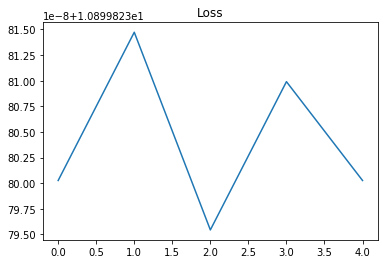

In [45]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

NameError: name 'history' is not defined

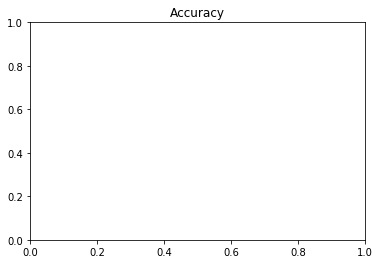

In [42]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();
